# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [7]:
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [8]:
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [9]:
df_titanic_passengers = df_titanic[(df_titanic['class'] == '1st') | (df_titanic['class'] == '2nd') | (df_titanic['class'] == '3rd')]

df_titanic_passengers

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [10]:
pd.crosstab(df_titanic_passengers["class"], df_titanic_passengers["embarked"])

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [11]:
given_embarked = pd.crosstab(df_titanic_passengers["class"], df_titanic_passengers["embarked"], normalize = "columns")
given_class = pd.crosstab(df_titanic_passengers["class"], df_titanic_passengers["embarked"], normalize = "index")

print(given_embarked)
print(given_class)

# of the 709 passangers in 3rd class, 494 embarked at Southampton. About 70% of passangers in 3rd class embarked from Southampton
# of the 914 passangers who embarked from Southampton, 494 were in 3rd class. About 54% of passangers who embarked from Southampton were in 3rd class

embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

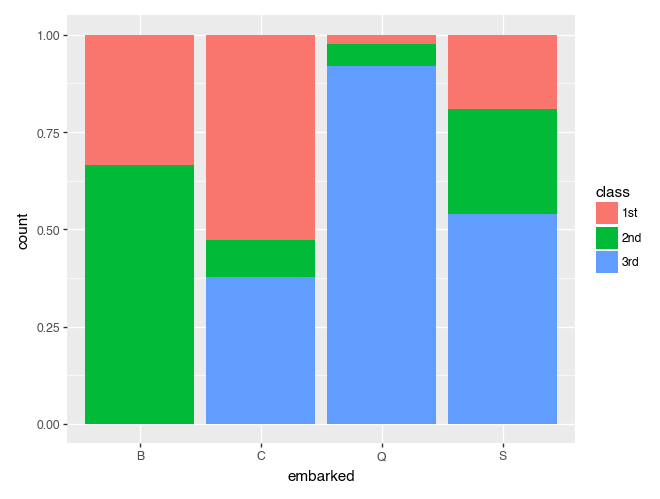

In [12]:
from plotnine import *

(ggplot(df_titanic_passengers,
aes(
  x = "embarked",
  fill = "class"
))
+ geom_bar(position = "fill")
)